In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./winequality-red.csv', sep = ';')
# print(df.info())

# Convert the quality rating into binary representation e.g. [6,7,8,9] -> 1, else -> 0
def binaryConversionForQuality(dataframe, columnname):
    for index, row in df.iterrows():
        if row['quality'] >= 6:
            df.at[index, columnname] = 1
        else: 
            df.at[index, columnname] = 0

binaryConversionForQuality(df,'quality')
df.loc[:,df.columns!='quality'].astype(float).round(5) # Set the maximum decimal place for the dataframe to be 5
#print(df['quality'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [3]:
cleaned_csv = df.to_csv('./winequality-red-cleaned.csv', index = None, header = True)
dataArray = df.values 
#print(df['quality'])

In [4]:
df.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  0.534709
dtype: float64

In [5]:
# plot distribution histogram
def plot(df,feature):
    value = df[feature]
    plt.hist(value)
    plt.xlabel(feature + ' values')
    plt.ylabel('Frequency')
    plt.title(feature)
    plt.show()

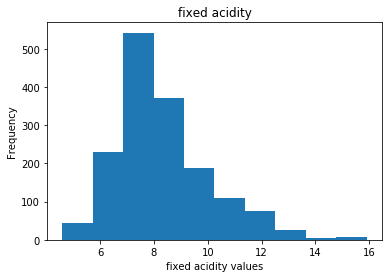

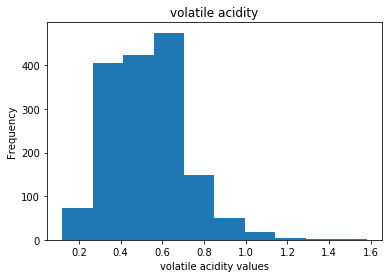

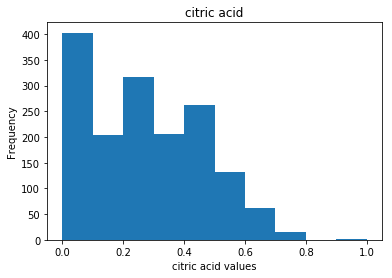

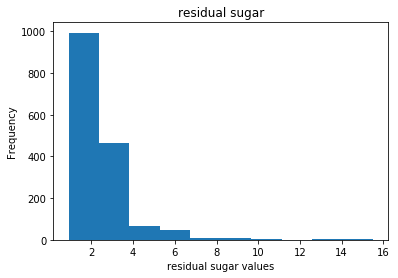

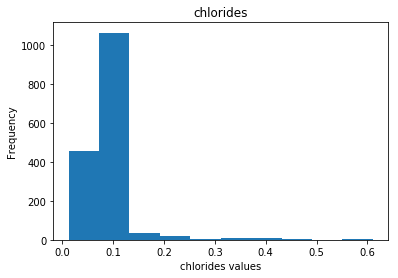

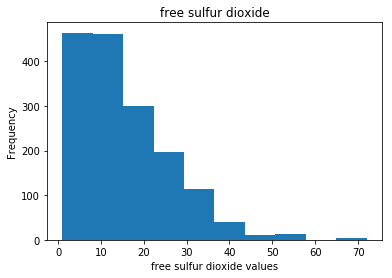

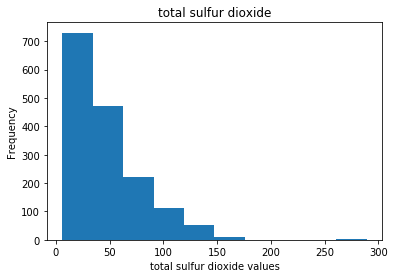

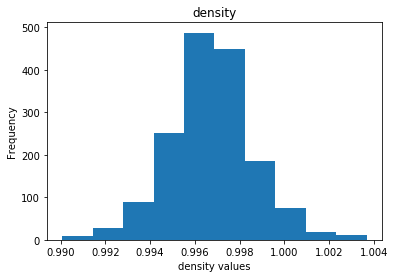

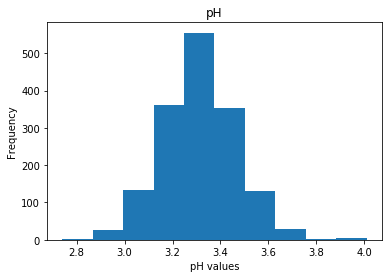

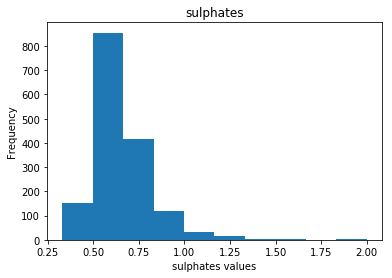

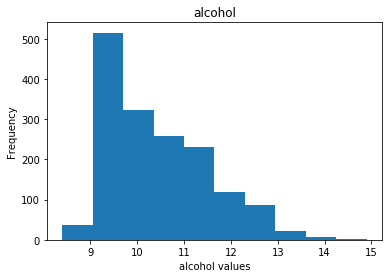

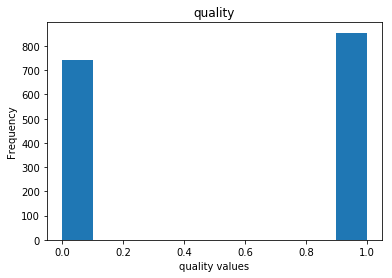

In [6]:
for column in df.columns:
    plot(df,column)

In [7]:
x = df.loc[:,df.columns!='quality']

In [8]:
x = np.array (x)

In [9]:
y = df["quality"]

In [10]:
y = np.array([[yi] for yi in y])

In [11]:
import math

In [12]:
class LogisticRegression(object):
    
    def __init__(self):
        pass
    
    def logictic_function (self, a):
        try:
            expa = math.exp(-a)
        except OverflowError:
            expa = float('inf')
        sigma = 1 / (1+expa)
        return sigma
    
    def fit (self, x, y, rate, iteration):
        i = 1
        w = np.zeros((len(x[0]),1))
        w_next = np.zeros((len(x[0]),1))
        
        
        while i<iteration: 
            w = w_next
            
            derivative = np.zeros((len(x[0]),1))
            for j in range (0, len(x)):
                xj = np.array([[element] for element in x[j]])
                sigma = self.logictic_function ( np.matmul(np.transpose(w), xj) )
                derivative = np.add (derivative,  np.array( [[element] for element in xj @ (y[j] - sigma)])  )
                         
            w_next = np.add(w, rate(i) * derivative)
            i = i + 1
            
        self.w = w_next
    
    
    def predict (self, x):
        return np.array(list(map(lambda xi: [1] if np.sum([xi] @ self.w) > 0 else [0], x)))

In [13]:
LRModel = LogisticRegression()
LRModel.fit (x, y, lambda n: 0.001/(n+1), 3000)

In [15]:
LRModel.predict(x)

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [14]:
prediction = LRModel.predict(x)
counter = 0
for i in range(0, len(prediction)):
    if LRModel.predict(x)[i]==y[i]:
        counter += 1
print (counter)

1061
